In [27]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute,Aer
import math
from qiskit.tools.monitor import job_monitor
print("Imports Successful")

Imports Successful


In [30]:
#IBMQ.enable_account('Enter API token')
#provider = IBMQ.get_provider(hub='ibm-q')
provider = Aer.get_backend('aer_simulator')

pi = math.pi
q = QuantumRegister(4,'q')
c = ClassicalRegister(4,'c')
qc = QuantumCircuit(q,c)

print('\nInitialising Circuit...\n')

### Initialisation ###

qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])

print('\nPreparing Oracle circuit....\n')

### 0000 Oracle ###

qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])


#### Amplification ####
qc.barrier()
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])

qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])

### Measurment ###
qc.barrier(q)
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])
qc.measure(q[3], c[3])

qc.draw()
backend = Aer.get_backend('aer_simulator')
print('\nExecuting job....\n')
job = execute(qc, backend, shots=100)

job_monitor(job)
counts = job.result().get_counts()

print('RESULT: ',counts,'\n')



Initialising Circuit...


Preparing Oracle circuit....


Executing job....

Job Status: job has successfully run
RESULT:  {'0001': 3, '1000': 2, '0110': 2, '0100': 2, '1110': 2, '1011': 5, '0111': 3, '0011': 4, '0000': 55, '1101': 4, '0010': 5, '1001': 4, '0101': 2, '1100': 2, '1010': 2, '1111': 3} 



In [31]:
qc.draw()

┌───┐┌───┐                                                              »
q_0: ┤ H ├┤ X ├─■──────────■───────────────■──────────────────────────────■──»
     ├───┤├───┤ │        ┌─┴─┐           ┌─┴─┐                            │  »
q_1: ┤ H ├┤ X ├─┼────────┤ X ├─■─────────┤ X ├─■──────────■───────────────┼──»
     ├───┤├───┤ │        └───┘ │         └───┘ │        ┌─┴─┐           ┌─┴─┐»
q_2: ┤ H ├┤ X ├─┼──────────────┼───────────────┼────────┤ X ├─■─────────┤ X ├»
     ├───┤├───┤ │U1(π/4)       │U1(-π/4)       │U1(π/4) └───┘ │U1(-π/4) └───┘»
q_3: ┤ H ├┤ X ├─■──────────────■───────────────■──────────────■──────────────»
     └───┘└───┘                                                              »
c: 4/════════════════════════════════════════════════════════════════════════»
                                                                             »
«                                      ┌───┐         ░ ┌───┐┌───┐          »
«q_0: ────────────────────────────■────┤ X ├─────────░─┤ H ├┤ X ├─■────────»
«                       ┌───┐     │    └───┘         ░ ├───┤├───┤ │        »
«q_1: ────────────■─────┤ X ├─────┼──────────────────░─┤ H ├┤ X ├─┼────────»
«               ┌─┴─┐   └───┘   ┌─┴─┐          ┌───┐ ░ ├───┤├───┤ │        »
«q_2: ─■────────┤ X ├─■─────────┤ X ├─■────────┤ X ├─░─┤ H ├┤ X ├─┼────────»
«      │U1(π/4) └───┘ │U1(-π/4) └───┘ │U1(π/4) ├───┤ ░ ├───┤├───┤ │U1(π/4) »
«q_3: ─■──────────────■───────────────■────────┤ X ├─░─┤ H ├┤ X ├─■────────»
«                                              └───┘ ░ └───┘└───┘          »
«c: 4/═════════════════════════════════════════════════════════════════════»
«                                                                          »
«                                                                        »
«q_0: ──■───────────────■──────────────────────────────■─────────────────»
«     ┌─┴─┐           ┌─┴─┐                            │                 »
«q_1: ┤ X ├─■─────────┤ X ├─■──────────■───────────────┼──────────────■──»
«     └───┘ │         └───┘ │        ┌─┴─┐           ┌─┴─┐          ┌─┴─┐»
«q_2: ──────┼───────────────┼────────┤ X ├─■─────────┤ X ├─■────────┤ X ├»
«           │U1(-π/4)       │U1(π/4) └───┘ │U1(-π/4) └───┘ │U1(π/4) └───┘»
«q_3: ──────■───────────────■──────────────■───────────────■─────────────»
«                                                                        »
«c: 4/═══════════════════════════════════════════════════════════════════»
«                                                                        »
«                       ┌───┐   ┌───┐      ░ ┌─┐         
«q_0: ─────────────■────┤ X ├───┤ H ├──────░─┤M├─────────
«        ┌───┐     │    ├───┤   └───┘      ░ └╥┘┌─┐      
«q_1: ───┤ X ├─────┼────┤ H ├──────────────░──╫─┤M├──────
«        └───┘   ┌─┴─┐  └───┘   ┌───┐┌───┐ ░  ║ └╥┘┌─┐   
«q_2: ─■─────────┤ X ├─■────────┤ X ├┤ H ├─░──╫──╫─┤M├───
«      │U1(-π/4) └───┘ │U1(π/4) ├───┤├───┤ ░  ║  ║ └╥┘┌─┐
«q_3: ─■───────────────■────────┤ X ├┤ H ├─░──╫──╫──╫─┤M├
«                               └───┘└───┘ ░  ║  ║  ║ └╥┘
«c: 4/════════════════════════════════════════╩══╩══╩══╩═
«                                             0  1  2  3

In [39]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc


n = 2
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1])
#grover_circuit.draw()

# Oracle
#grover_circuit.cz(0,1) #for 11
grover_circuit.cz(0,1)
grover_circuit.draw()

# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw()




┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘

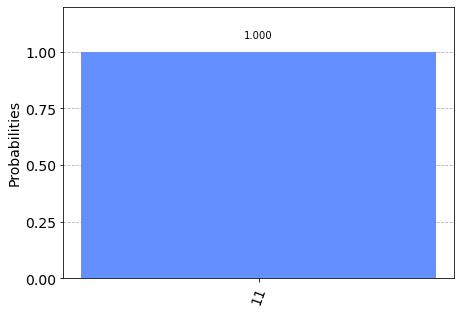

In [37]:
# Simulator
sv_sim = Aer.get_backend('statevector_simulator')
qobj = assemble(grover_circuit)
result = sv_sim.run(qobj).result()
statevec = result.get_statevector()

grover_circuit.measure_all()

qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(grover_circuit)
result = qasm_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

/home/rbh/miniconda3/envs/quanMech/lib/python3.9/site-packages/qiskit/aqua/algorithms/amplitude_amplifiers/grover.py:215: DeprecationWarning: The package qiskit.aqua.algorithms.amplitude_amplifiers is deprecated. It was moved/refactored to qiskit.algorithms.amplitude_amplifiers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('aqua.algorithms.amplitude_amplifiers',
/home/rbh/miniconda3/envs/quanMech/lib/python3.9/site-packages/qiskit/aqua/quantum_instance.py:135: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_class('aqua.QuantumInstance',
[-1, -2, -3]


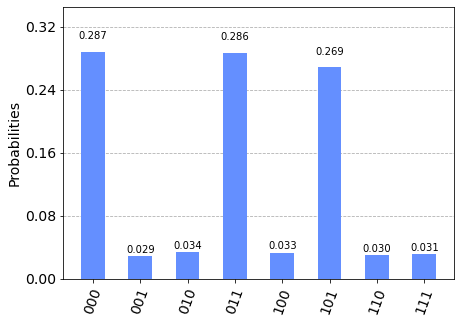

In [49]:
import numpy as np
from qiskit import BasicAer
from qiskit.visualization import plot_histogram
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle

input_3sat = '''
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''


oracle = LogicalExpressionOracle(input_3sat)
grover = Grover(oracle)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = grover.run(quantum_instance)
print(result['assignment'])


plot_histogram(result['measurement'])

In [50]:
LogicalExpressionOracle??

 is the standard format for specifying SATisfiability (SAT) problem instances in
    `Conjunctive Normal Form (CNF) <https://en.wikipedia.org/wiki/Conjunctive_normal_form>`__,
    which is a conjunction of one or more clauses, where a clause is a disjunction of one
    or more literals.

    The following is an example of a CNF expressed in DIMACS format:

    .. code:: text

      c This is an example DIMACS CNF file with 3 satisfying assignments: 1 -2 3, -1 -2 -3, 1 2 -3.
      p cnf 3 5
      -1 -2 -3 0
      1 -2 3 0
      1 2 -3 0
      1 -2 -3 0
      -1 2 3 0

    The first line, following the `c` character, is a comment. The second line specifies that the
    CNF is over three boolean variables --- let us call them  :math:`x_1, x_2, x_3`, and contains
    five clauses.  The five clauses, listed afterwards, are implicitly joined by the logical `AND`
    operator, :math:`\land`, while the variables in each clause, represented by their indices,
    are implicitly disjoined by the 

In [76]:
#IBMQ.enable_account('Enter API token')
#provider = IBMQ.get_provider(hub='ibm-q')
provider = Aer.get_backend('aer_simulator')

pi = math.pi
q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')
qc = QuantumCircuit(q,c)

### Initialisation ###

qc.h(q[0])
qc.x(q[1])
qc.h(q[1])


qc.draw()




┌───┐     
q_0: ┤ H ├─────
     ├───┤┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘
c: 2/══════════

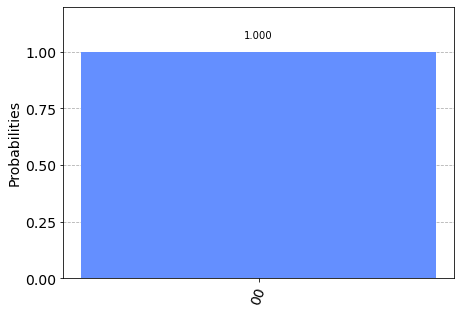

In [77]:
qasmsim = Aer.get_backend('qasm_simulator')  # Tell Qiskit how to simulate our circuit
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = qasmsim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output state vector

# Again...

In [61]:
from qiskit import QuantumCircuit
noQubit = 3
noCbit  = noQubit
qc = QuantumCircuit(noQubit, noQubit)
#1. Init; Turn all Qubits to superposition
setHadGate(qc, noQubit) 
qc.barrier()
#2. Oracle; a blackbox "designed" by dataset designer

qc.barrier()
#3. Amplifier

#setHadGate(qc, noQubit) 
setDiffuser(qc, noQubit)
qc.barrier()
setMeasure(qc, noQubit)


qc.draw()

┌───┐ ░  ░ ┌───┐┌───┐┌───┐┌───┐     ┌───┐┌───┐      ░ ┌─┐      
q_0: ┤ H ├─░──░─┤ H ├┤ X ├┤ X ├┤ H ├──■──┤ X ├┤ H ├──────░─┤M├──────
     ├───┤ ░  ░ ├───┤├───┤├───┤├───┤  │  ├───┤├───┤      ░ └╥┘┌─┐   
q_1: ┤ H ├─░──░─┤ H ├┤ X ├┤ X ├┤ H ├──■──┤ X ├┤ H ├──────░──╫─┤M├───
     ├───┤ ░  ░ ├───┤├───┤└───┘└───┘┌─┴─┐├───┤├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├─░──░─┤ H ├┤ X ├──────────┤ X ├┤ H ├┤ X ├┤ H ├─░──╫──╫─┤M├
     └───┘ ░  ░ └───┘└───┘          └───┘└───┘└───┘└───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════════════════════════════════════════╩══╩══╩═
                                                            0  1  2

array([0, 1, 2, 3, 4, 5])

In [ ]:
# Simulate and plot results
qasm_simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, qasm_simulator)
qobj = assemble(transpiled_qc)
result = qasm_sim.run(qobj).result()
plot_histogram(result.get_counts())

In [52]:
def setHadGate(qc, noQubit):#assign Hadamard gate to all qubit
    for i in range(noQubit): 
        qc.h(i)
def setMeasure(qc, noQubit):
    qc.measure(np.linspace(0,noQubit-1,noQubit, dtype=int)
,np.linspace(0,noQubit-1,noQubit, dtype=int)
)

def setDiffuser(qc, noQubit):
    setHadGate(qc, noQubit)
    for i in range(noQubit): 
        qc.x(i)
    for i in range(noQubit-1): 
        qc.x(i)
    setHadGate(qc, noQubit-1)
    qc.mct(list(range(noQubit-1)), noQubit-1)
    qc.h(noQubit-1)
    for i in range(noQubit): 
        qc.x(i)
    setHadGate(qc, noQubit)


## Plot

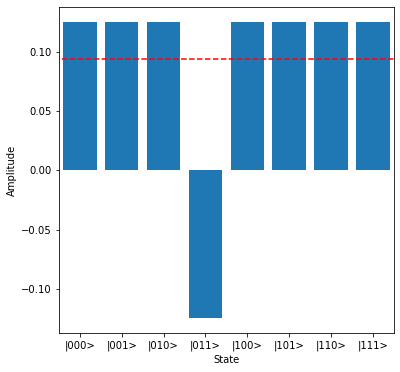

### Implementation of Grover's Search Algo

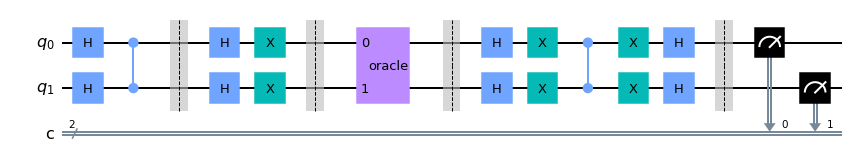

In [95]:
#Import libraries from qiskit
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from qiskit import *

noQubit = 2
q = QuantumRegister(noQubit, 'q')
c = ClassicalRegister(noQubit, 'c')
qc = QuantumCircuit(q,c)

#1. Init; Turn all Qubits to superposition
qc.h(q)

qc.cz(q[-1],q[0])
qc.barrier(q)
#Turn all qubits to superposition

qc.h(q)
qc.x(q)
qc.barrier(q)
#2. Oracle; a blackbox "designed" by dataset designer

#qc.cz(q[1],q[0])
oracle = Operator([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, -1, 0],
    [0, 0, 0, 1]
])

#oracle=np.identity(3)
qc.unitary(oracle, [0, 1], label='oracle')


#Turn all qubits form superposition to abs state
qc.barrier(q)
qc.h(q)
qc.x(q)
qc.cz(q[-1],q[0])
qc.x(q)
qc.h(q)
qc.barrier(q)


qc.measure(q,c)

qc.draw(output='mpl')

#3. Amplifier


RESULT:  {'010': 2048} 



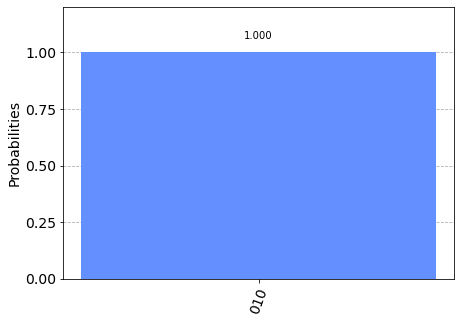

In [83]:
# Step 4: Run on backend simulator and print results
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 2048).result()
counts = result.get_counts()

print('RESULT: ',counts,'\n')

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [93]:
oracle=Operator(np.identity(3))
qc.unitary(oracle, [0, 1, 2], label='oracle')

ExtensionError: 'Input matrix is not an N-qubit operator.'

In [61]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info.operators import Operator
controls = QuantumRegister(2)
circuit = QuantumCircuit(controls)

cx = Operator([
    [1, 0, 0, 0],
    [0, -1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])
circuit.unitary(cx, [0, 1], label='Qf')
circuit.draw()

┌─────┐
q9_0: ┤0    ├
      │  Qf │
q9_1: ┤1    ├
      └─────┘